In [129]:
import datetime
#numpyのインストール
import numpy as np
#pandasのインストール
import pandas as pd
#statistics
import statistics as st
#statsmodelsのインストール
import statsmodels.api as sm
#時系列モデルのインストール
from statsmodels.tsa import stattools as st
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.arima_model import ARIMA
#scikit-learnのインストール
import sklearn.linear_model as lm
#msnoのインストール
import missingno as msno
#pyplotのインストール
import matplotlib.pyplot as plt
#seabornのインストール
import seaborn as sns
%matplotlib inline
sns.set()
lr = lm.LogisticRegression()

In [130]:
w_data = pd.read_csv('data4.csv', index_col='year', parse_dates=True)

In [136]:
w_data = w_data.loc[:'2015-12-01']

In [137]:
w_data

avg_temp    sun  avg_wind  avg_cloud_quantity  rain_sum
year                                                               
2000-01-01       7.3  144.0       3.5                 6.3      76.5
2000-02-01       5.6  198.9       3.7                 4.4       3.0
2000-03-01       9.0  202.7       4.2                 4.9     114.0
2000-04-01      14.0  173.7       3.9                 6.6     117.5
2000-05-01      19.1  197.1       3.5                 7.0      74.5
2000-06-01      21.4  132.6       3.5                 8.5     267.0
2000-07-01      26.4  228.2       3.8                 6.5     223.5
2000-08-01      27.2  228.3       3.1                 6.7      95.5
2000-09-01      24.4  131.4       3.2                 7.4     309.5
2000-10-01      18.1   92.6       3.0                 8.2     141.0
2000-11-01      12.8  110.0       3.5                 7.2     127.0
2000-12-01       8.5  184.8       3.5                 4.6       8.5
2001-01-01       4.6  173.9       4.1                 5.0     146.5
2001-02-01       6.2  146.9       3.6                 6.1      38.5
2001-03-01       9.4  181.3       4.1                 5.9     133.5
2001-04-01      15.0  226.6       3.9                 5.6      64.0
2001-05-01      18.7  170.0       3.5                 7.6     194.5
2001-06-01      22.2  114.5       3.0                 8.8     141.0
2001-07-01      27.4  275.5       3.9                 5.9      46.5
2001-08-01      25.8  132.8       2.8                 8.4     162.5
2001-09-01      22.6  119.0       3.2                 7.6     215.5
2001-10-01      18.1  149.4       3.3                 6.4     306.5
2001-11-01      12.4  172.0       3.0                 4.9     139.5
2001-12-01       8.0  201.7       3.4                 4.6      42.0
2002-01-01       7.2  199.5       3.9                 4.3     104.5
2002-02-01       7.4  170.8       3.4                 5.5      33.5
2002-03-01      11.8  204.0       4.1                 5.9     101.0
2002-04-01      15.6  165.3       4.2                 7.3      66.5
2002-05-01      17.7  154.0       3.4                 8.1     141.0
2002-06-01      20.7  129.1       3.2                 8.3     242.0
...              ...    ...       ...                 ...       ...
2013-07-01      26.3  176.8       3.2                 8.8      80.0
2013-08-01      28.4  242.5       3.3                 7.0      79.5
2013-09-01      24.5  179.0       3.6                 6.5     192.0
2013-10-01      19.4  123.9       4.0                 7.9     394.0
2013-11-01      13.2  185.0       3.5                 4.6      21.0
2013-12-01       8.2  193.2       3.4                 4.7      54.0
2014-01-01       6.4  206.6       3.7                 4.9      38.5
2014-02-01       5.8  126.0       4.2                 7.6     127.5
2014-03-01      10.1  197.5       4.3                 6.3     128.0
2014-04-01      14.3  222.0       3.4                 6.0     154.5
2014-05-01      19.5  253.0       3.8                 6.4     127.5
2014-06-01      22.6  172.1       2.9                 8.4     348.5
2014-07-01      25.9  197.5       3.0                 7.4      68.5
2014-08-01      26.8  197.3       4.1                 7.2     125.5
2014-09-01      22.8  166.6       3.1                 7.6      88.5
2014-10-01      18.6  142.6       3.3                 7.3     476.0
2014-11-01      14.0  142.2       3.5                 6.4      90.0
2014-12-01       7.5  197.3       3.4                 4.4      87.0
2015-01-01       6.2  188.9       3.7                 4.5     106.5
2015-02-01       6.4  167.3       3.5                 5.6      53.0
2015-03-01      10.5  184.9       3.9                 6.0     113.0
2015-04-01      14.6  152.5       3.7                 8.1     121.0
2015-05-01      20.8  249.9       3.6                 7.0      69.5
2015-06-01      21.9  143.1       2.8                 8.9     145.5
2015-07-01      26.0  204.8       3.6                 7.7     325.5
2015-08-01      26.8  176.8       3.3                 7.4     118.0


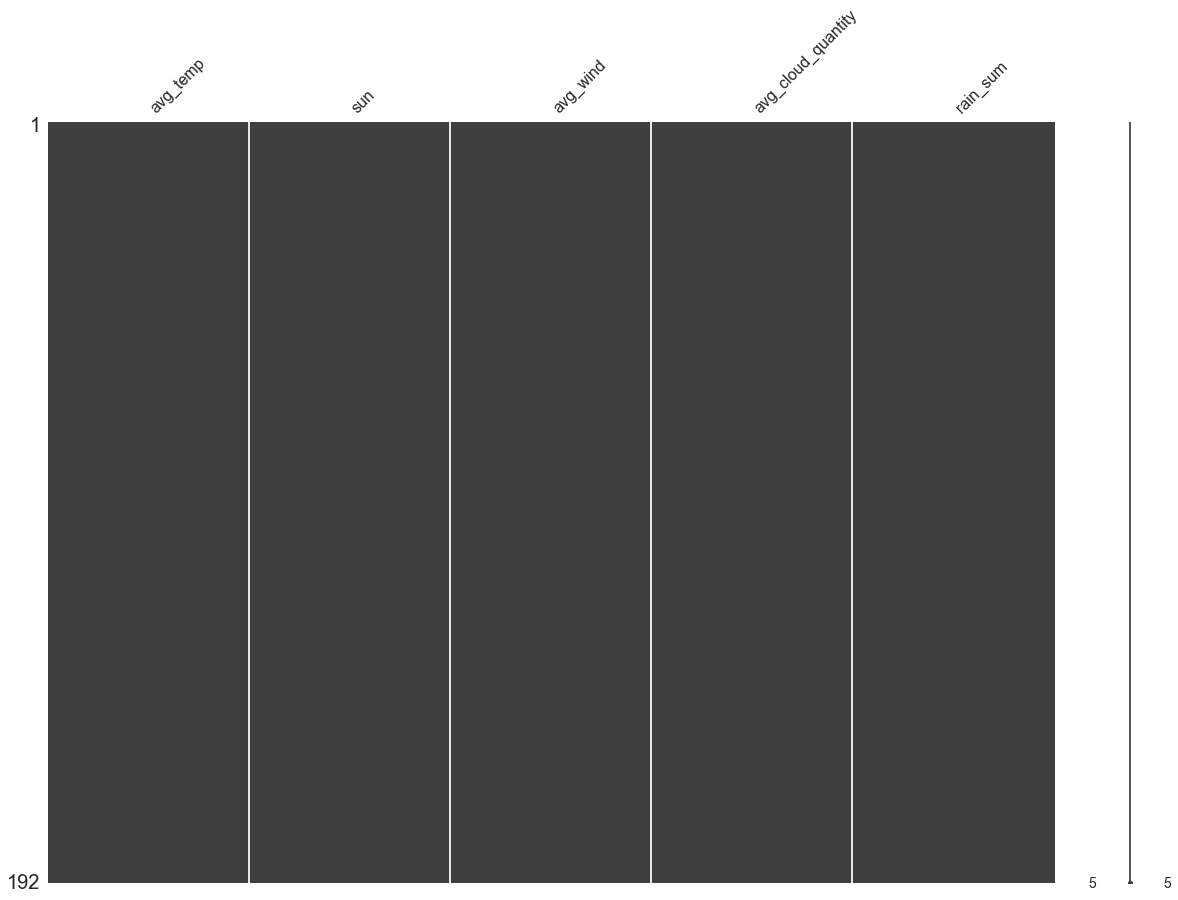

In [138]:
#データ欠損の確認 (欠損なし！)
msno.matrix(df=w_data,figsize=(20,14))

In [139]:
#原系列に対するADF検定
print (st.adfuller(w_data['avg_temp'].values.ravel()))
print (st.adfuller(w_data['sun'].values.ravel()))
print (st.adfuller(w_data['avg_wind'].values.ravel()))
print (st.adfuller(w_data['rain_sum'].values.ravel()))
print (st.adfuller(w_data['avg_cloud_quantity'].values.ravel()))

(-3.2900637663836467, 0.015328508913554114, 13, 178, {'1%': -3.4676315191519058, '5%': -2.8779183721695567, '10%': -2.5755013533644742}, 560.48497992308887)
(-5.6165891924804789, 1.1706063243549711e-06, 5, 186, {'1%': -3.466005071659723, '5%': -2.8772078537639385, '10%': -2.5751221620996647}, 1800.7981370591356)
(-1.9690874586506262, 0.30028943670292751, 13, 178, {'1%': -3.4676315191519058, '5%': -2.8779183721695567, '10%': -2.5755013533644742}, 133.76320669439235)
(-7.9693109344847652, 2.8091012202364616e-12, 9, 182, {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}, 2119.8995652066324)
(-2.8600582212346004, 0.05019373726663235, 12, 179, {'1%': -3.4674201432469816, '5%': -2.8778260518445382, '10%': -2.5754520823320122}, 498.07156685371541)


# Since P-value is not less than 0.01 , these vars are 単位根

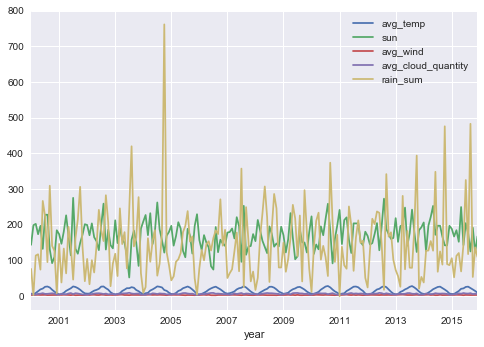

In [140]:
#原系列のplot
w_data.plot()

In [141]:
##各移動平均と差分系列を取得
#気温
temp_data = w_data.loc[:,['avg_temp']]
temp_moving_avg = temp_data.rolling(window=12).mean().dropna()
temp_diff = temp_data.diff().dropna()
#日差し
sun_data = w_data.loc[:,['sun']]
sun_moving_avg = sun_data.rolling(window=12).mean().dropna()
sun_diff = sun_data.diff().dropna()
#風量
wind_data = w_data.loc[:,['avg_wind']]
wind_moving_avg = wind_data.rolling(window=12).mean().dropna()
wind_diff = wind_data.diff().dropna()
#雨量
rain_data = w_data.loc[:,['rain_sum']]
rain_moving_avg = rain_data.rolling(window=12).mean().dropna()
rain_diff = rain_data.diff().dropna()
#雲量
cloud_data = w_data.loc[:,['avg_cloud_quantity']]
cloud_moving_avg = cloud_data.rolling(window=12).mean().dropna()
cloud_diff = cloud_data.diff().dropna()

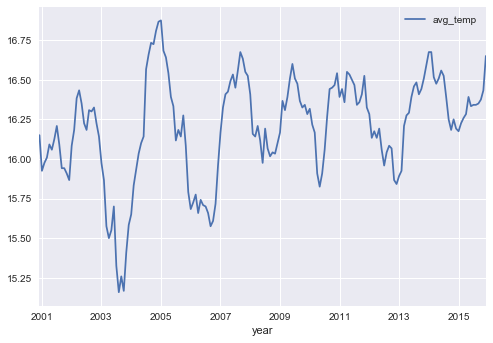

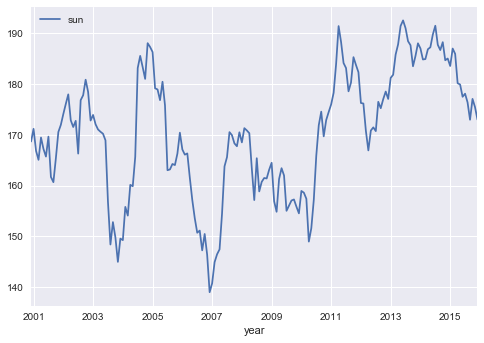

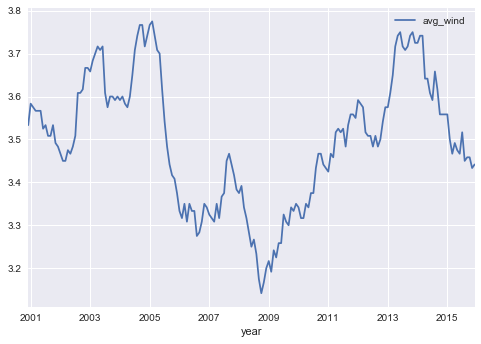

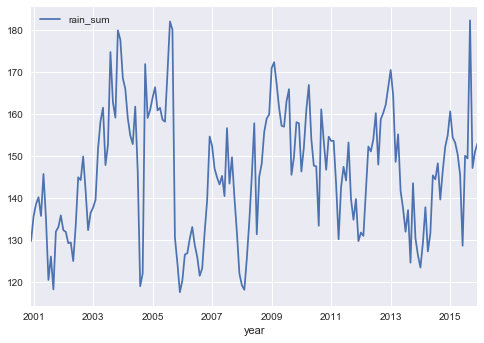

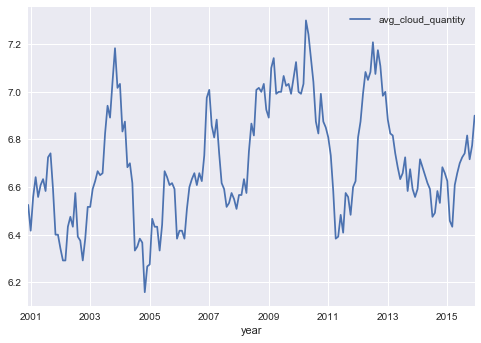

In [142]:
temp_moving_avg.plot()
sun_moving_avg.plot()
wind_moving_avg.plot()
rain_moving_avg.plot()
cloud_moving_avg.plot()

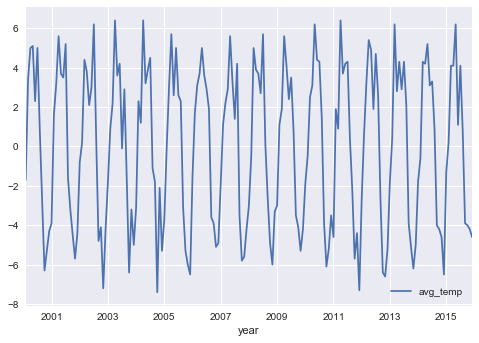

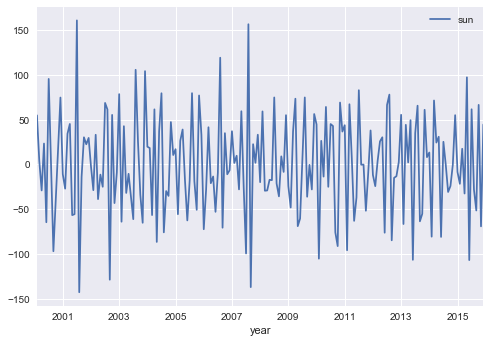

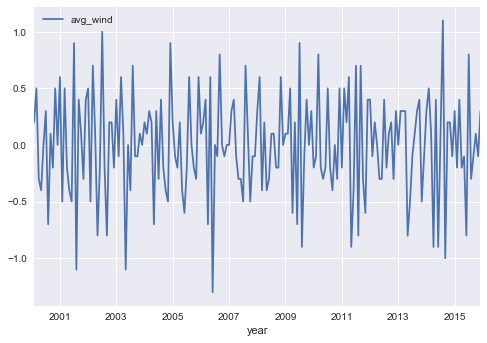

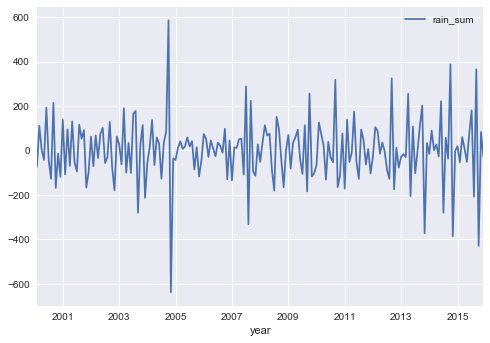

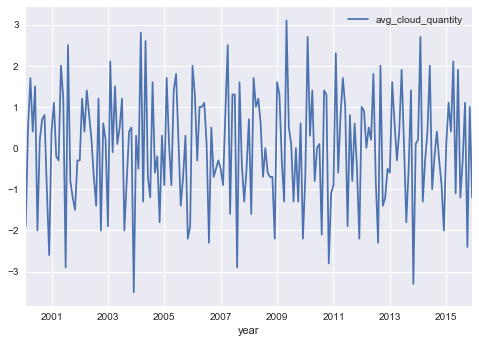

In [143]:
#差分系列のplot
temp_diff.plot()
sun_diff.plot()
wind_diff.plot()
rain_diff.plot()
cloud_diff.plot()

## 差分系列が定常過程なので、単位根過程として捉える

In [144]:
diff_data = pd.concat([temp_diff,sun_diff,wind_diff,rain_diff,cloud_diff],axis=1)

In [145]:
#差分系列をADF検定
print (st.adfuller(temp_diff['avg_temp'].values.ravel()))
print (st.adfuller(sun_diff['sun'].values.ravel()))
print (st.adfuller(wind_diff['avg_wind'].values.ravel()))
print (st.adfuller(rain_diff['rain_sum'].values.ravel()))
print (st.adfuller(cloud_diff['avg_cloud_quantity'].values.ravel()))

(-14.539882507213544, 5.1664373894042588e-27, 10, 180, {'1%': -3.4672111510631001, '5%': -2.8777347668038411, '10%': -2.5754033641975309}, 565.30207088154862)
(-7.5183283271205994, 3.8499464129428689e-11, 10, 180, {'1%': -3.4672111510631001, '5%': -2.8777347668038411, '10%': -2.5754033641975309}, 1801.6282255373058)
(-12.10730820681971, 1.9554655283788218e-22, 10, 180, {'1%': -3.4672111510631001, '5%': -2.8777347668038411, '10%': -2.5754033641975309}, 135.59317233937634)
(-9.3543207716320307, 8.1363524828733822e-16, 12, 178, {'1%': -3.4676315191519058, '5%': -2.8779183721695567, '10%': -2.5755013533644742}, 2127.3578049228149)
(-10.686799428742827, 3.8148646198408948e-19, 11, 179, {'1%': -3.4674201432469816, '5%': -2.8778260518445382, '10%': -2.5754520823320122}, 502.10981899820166)


# 単位根なので、差分系列同士で相関関係を確認する!

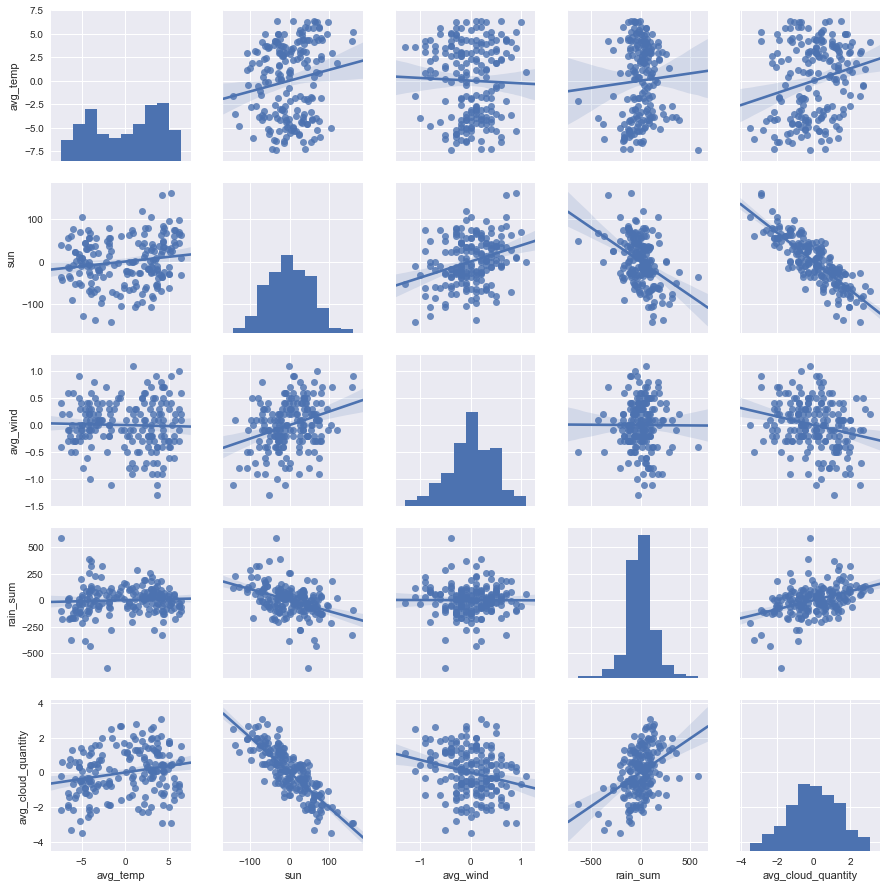

In [146]:
sns.pairplot(diff_data,kind='reg')

In [147]:
correlation_matrix = np.corrcoef(diff_data.transpose())

In [148]:
names = ['avg_temp','sun','avg_wind','rain_sum','cloud_quantity']

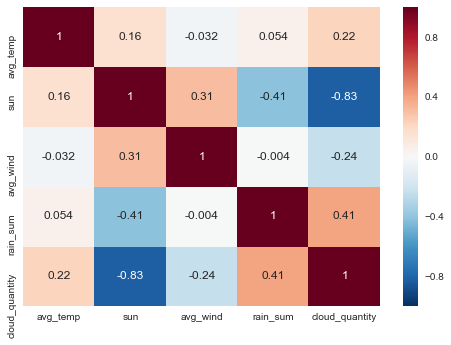

In [149]:
sns.heatmap(correlation_matrix, annot=True, xticklabels=names,yticklabels=names)

# Cloud quantityは日差しとか、気温とかとあまりにも相関するからバイバイする

In [150]:
w_data = w_data.drop(['avg_cloud_quantity'],axis=1)
diff_data = diff_data.drop(['avg_cloud_quantity'],axis=1)

# 横浜市のデータを読み込む！

# うまく書けなかった。。
num=2000
df = pd.DataFrame()

for i in range (15):
    df = df.append(pd.read_excel('yoko_econ.xlsx',sheetname=2016))
    num += 1

In [151]:
dat2000 = pd.read_excel('yoko_econ.xlsx',sheetname='2000').T.drop(['平均'],axis=0).reset_index()
dat2001 = pd.read_excel('yoko_econ.xlsx',sheetname='2001').T.drop(['平均'],axis=0).reset_index()
dat2002 = pd.read_excel('yoko_econ.xlsx',sheetname='2002').T.drop(['平均'],axis=0).reset_index()
dat2003 = pd.read_excel('yoko_econ.xlsx',sheetname='2003').T.drop(['平均'],axis=0).reset_index()
dat2004 = pd.read_excel('yoko_econ.xlsx',sheetname='2004').T.drop(['平均'],axis=0).reset_index()
dat2005 = pd.read_excel('yoko_econ.xlsx',sheetname='2005').T.drop(['平均'],axis=0).reset_index()
dat2006 = pd.read_excel('yoko_econ.xlsx',sheetname='2006').T.drop(['平均'],axis=0).reset_index()
dat2007 = pd.read_excel('yoko_econ.xlsx',sheetname='2007').T.drop(['平均'],axis=0).reset_index()
dat2008 = pd.read_excel('yoko_econ.xlsx',sheetname='2008').T.drop(['平均'],axis=0).reset_index()
dat2009 = pd.read_excel('yoko_econ.xlsx',sheetname='2009').T.drop(['平均'],axis=0).reset_index()
dat2010 = pd.read_excel('yoko_econ.xlsx',sheetname='2010').T.drop(['平均'],axis=0).reset_index()
dat2011 = pd.read_excel('yoko_econ.xlsx',sheetname='2011').T.drop(['平均'],axis=0).reset_index()
dat2012 = pd.read_excel('yoko_econ.xlsx',sheetname='2012').T.drop(['平均'],axis=0).reset_index()
dat2013 = pd.read_excel('yoko_econ.xlsx',sheetname='2013').T.drop(['平均'],axis=0).reset_index()
dat2014 = pd.read_excel('yoko_econ.xlsx',sheetname='2014').T.drop(['平均'],axis=0).reset_index()
dat2015 = pd.read_excel('yoko_econ.xlsx',sheetname='2015').T.drop(['平均'],axis=0).reset_index()
#dat2016 = pd.read_excel('yoko_econ.xlsx',sheetname='2016').T.drop(['平均'],axis=0).reset_index()
#dat2016は平均値をもたないよ（）

In [152]:
#縦型のデータに突合する
dat = pd.concat([dat2000,dat2001,dat2002,dat2003,dat2004,dat2005,dat2006,dat2007,dat2008,dat2009,dat2010,dat2011,dat2012,dat2013,dat2014,dat2015],axis=0)

In [153]:
tar_data = dat.set_index('index').loc[:,['消費支出','食料','住居','光熱・水道','家具・家事用品','被服及び履物','保健医療','交通・通信','教育','教養娯楽','その他の消費支出']]

In [154]:
tar_data

消費支出       食料       住居    光熱・水道  家具・家事用品  家具・家事用品   被服及び履物  \
index                                                                        
2000-01-01  340685.0   7651.0  22575.0  27755.0  12681.0    796.0  20162.0   
2000-02-01  310339.0   4922.0  24182.0  28342.0   9261.0    334.0  17196.0   
2000-03-01  355097.0   5583.0  30488.0  24892.0  13904.0    678.0  20167.0   
2000-04-01  347138.0   5232.0  20862.0  22401.0   8417.0    131.0  15745.0   
2000-05-01  339722.0   6903.0  21287.0  18980.0   6972.0    476.0  13528.0   
2000-06-01  277897.0   7434.0  21862.0  18071.0   8774.0    768.0  13789.0   
2000-07-01  341624.0   9916.0  20227.0  18659.0  13077.0    556.0  20807.0   
2000-08-01  292967.0   9016.0  19022.0  20593.0   9668.0   1319.0  11138.0   
2000-09-01  264407.0   7128.0  18804.0  19962.0   8161.0    293.0  12872.0   
2000-10-01  317650.0   4828.0  17559.0  20562.0   9027.0    367.0  17585.0   
2000-11-01  311888.0   8957.0  29313.0  19192.0  12351.0    410.0  21196.0   
2000-12-01  408225.0  17684.0  42438.0  24610.0  13651.0    576.0  17670.0   
2001-01-01  324998.0   6456.0  17532.0  27194.0   9421.0     98.0  17532.0   
2001-02-01  292788.0   3424.0  17344.0  29550.0   7140.0     36.0  14550.0   
2001-03-01  363455.0   6657.0  47502.0  24037.0   8472.0    405.0  18523.0   
2001-04-01  339837.0   3806.0  22187.0  21831.0  15651.0    327.0  16012.0   
2001-05-01  296883.0   4176.0  19544.0  20572.0   8686.0    191.0  17543.0   
2001-06-01  274426.0   6335.0  19303.0  18534.0   8832.0     68.0  15016.0   
2001-07-01  357849.0   9269.0  22466.0  18877.0  16737.0    247.0  15336.0   
2001-08-01  318508.0   7188.0  28973.0  20509.0  12472.0    261.0  11064.0   
2001-09-01  286305.0   4458.0  20009.0  19884.0   7912.0     71.0  12549.0   
2001-10-01  316837.0   5073.0  20281.0  20226.0  10694.0    310.0  14356.0   
2001-11-01  301446.0   7607.0  20542.0  19900.0   9085.0    460.0  19040.0   
2001-12-01  381595.0  13347.0  31640.0  23555.0  15910.0    383.0  16436.0   
2002-01-01  339626.0   5615.0  18797.0  25745.0   7554.0    233.0  23103.0   
2002-02-01  302867.0   5200.0  17730.0  26596.0   9698.0    128.0  10507.0   
2002-03-01  348627.0   7016.0  17740.0  25551.0   8601.0    700.0  18842.0   
2002-04-01  329913.0   4480.0  23559.0  21871.0  11843.0    588.0  17960.0   
2002-05-01  333945.0   6390.0  37530.0  19148.0  11457.0    375.0  18508.0   
2002-06-01  319452.0   6666.0  17500.0  19597.0  15510.0    485.0  16407.0   
...              ...      ...      ...      ...      ...      ...      ...   
2013-07-01  273343.0   8164.0  14036.0  19501.0   9693.0    258.0  12745.0   
2013-08-01  287399.0   8813.0  14957.0  19408.0   9420.0    312.0  12448.0   
2013-09-01  274081.0   4060.0  16132.0  19400.0   7345.0    239.0   9282.0   
2013-10-01  325978.0   4994.0  26349.0  20520.0  12197.0    119.0  12661.0   
2013-11-01  270695.0   6481.0  13101.0  17844.0  12325.0     93.0  15702.0   
2013-12-01  347939.0  13560.0  27879.0  23353.0  11052.0    541.0  14544.0   
2014-01-01  314685.0   5449.0  25352.0  29941.0   7156.0    442.0  16198.0   
2014-02-01  297811.0   3197.0  47101.0  30417.0   6927.0     86.0   9406.0   
2014-03-01  298133.0   7080.0  19348.0  30518.0   9895.0     98.0  12702.0   
2014-04-01  363095.0   5580.0  28556.0  28539.0  13664.0    300.0  18479.0   
2014-05-01  305726.0   6301.0  13741.0  24152.0   9722.0     99.0  18157.0   
2014-06-01  296751.0   5760.0  17137.0  20300.0  10310.0    868.0  13383.0   
2014-07-01  309220.0   7397.0  12601.0  18494.0  13726.0    158.0  17977.0   
2014-08-01  330001.0   8942.0  24964.0  21315.0  23214.0   1008.0  11184.0   
2014-09-01  308611.0   5837.0  14178.0  18284.0  10169.0     15.0  12266.0   
2014-10-01  304037.0   4018.0  17846.0  18700.0  10317.0      0.0  12639.0   
2014-11-01  298773.0   6901.0  31144.0  17043.0   8696.0    262.0  14006.0   
2014-12-01  338302.0  11462.0  11440.0  20874.0  19057.0    169.0  14637.0   
2015-01-01  294818.0   6749.0  11754.0

In [155]:
##各移動平均と差分系列を取得
#消費
consumption_data = tar_data.loc[:,['消費支出']]
consumption_moving_avg = consumption_data.rolling(window=12).mean().dropna()
consumption_diff = consumption_data.diff().dropna().dropna()
#食料
food_data = tar_data.loc[:,['食料']]
food_moving_avg = food_data.rolling(window=12).mean().dropna()
food_diff = food_data.diff().dropna()
#住居
estate_data = tar_data.loc[:,['住居']]
estate_moving_avg = estate_data.rolling(window=12).mean().dropna()
estate_diff = estate_data.diff().dropna()
#光熱、水道
utility_data = tar_data.loc[:,['光熱・水道']]
utility_moving_avg = utility_data.rolling(window=12).mean().dropna()
utility_diff = utility_data.diff().dropna()
#家具・家事用品
furniture_data = tar_data.loc[:,['家具・家事用品']]
furniture_moving_avg = furniture_data.rolling(window=12).mean().dropna()
furniture_diff = furniture_data.diff().dropna()
#被服及び履物
cloth_data = tar_data.loc[:,['被服及び履物']]
cloth_moving_avg = cloth_data.rolling(window=12).mean().dropna()
cloth_diff = cloth_data.diff().dropna()
#保健医療
medical_data = tar_data.loc[:,['保健医療']]
medical_moving_avg = medical_data.rolling(window=12).mean().dropna()
medical_diff = medical_data.diff().dropna()
#風量
com_data = tar_data.loc[:,['交通・通信']]
com_moving_avg = com_data.rolling(window=12).mean().dropna()
com_diff = com_data.diff().dropna()
#教育
edu_data = tar_data.loc[:,['教育']]
edu_moving_avg = edu_data.rolling(window=12).mean().dropna()
edu_diff = edu_data.diff().dropna()
#雲量
edu_fun_data = tar_data.loc[:,['教養娯楽']]
edu_fun_moving_avg = edu_fun_data.rolling(window=12).mean().dropna()
edu_fun_diff = edu_fun_data.diff().dropna()

In [156]:
#原系列に対するADF検定
print (st.adfuller(tar_data['消費支出'].values.ravel()))
print (st.adfuller(tar_data['食料'].values.ravel()))
print (st.adfuller(tar_data['住居'].values.ravel()))
print (st.adfuller(tar_data['光熱・水道'].values.ravel()))
print (st.adfuller(tar_data['家具・家事用品'].values.ravel()))
print (st.adfuller(tar_data['被服及び履物'].values.ravel()))
print (st.adfuller(tar_data['保健医療'].values.ravel()))
print (st.adfuller(tar_data['交通・通信'].values.ravel()))
print (st.adfuller(tar_data['教育'].values.ravel()))
print (st.adfuller(tar_data['教養娯楽'].values.ravel()))

(-1.8142038948570183, 0.37343300380958933, 11, 180, {'1%': -3.4672111510631001, '5%': -2.8777347668038411, '10%': -2.5754033641975309}, 4069.5035305453284)
(-2.8598647489026443, 0.050218207064792124, 13, 178, {'1%': -3.4676315191519058, '5%': -2.8779183721695567, '10%': -2.5755013533644742}, 3074.4091909200088)
(-5.7864261107432613, 4.987099498973615e-07, 2, 189, {'1%': -3.4654311561944873, '5%': -2.8769570530458792, '10%': -2.574988319755886}, 3669.2759700093111)
(-4.0662669702101875, 0.0011006248966932929, 13, 178, {'1%': -3.4676315191519058, '5%': -2.8779183721695567, '10%': -2.5755013533644742}, 3083.2184115307628)
(-5.0244540157950981, 1.9848431484155809e-05, 9, 374, {'1%': -3.4479562840494475, '5%': -2.8692991099175238, '10%': -2.5709034510566502}, 6703.1864183516573)
(-3.5451502867737474, 0.0069004876884023693, 11, 372, {'1%': -3.4480516066132636, '5%': -2.8693409974737589, '10%': -2.5709257824603999}, 6778.3413657591027)
(-11.278548168300956, 1.4756880765410396e-20, 0, 191, {'1

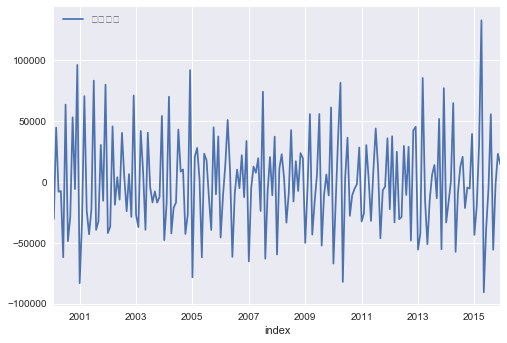

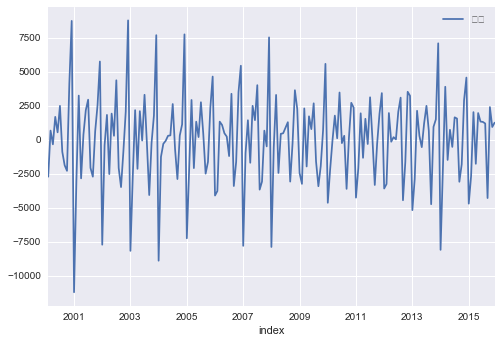

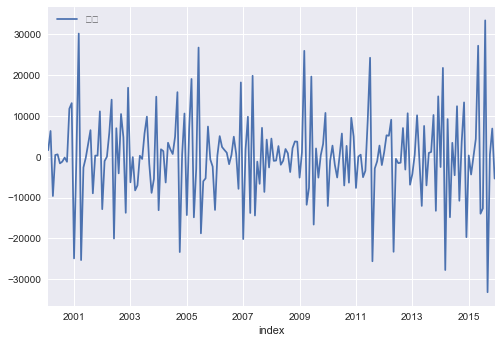

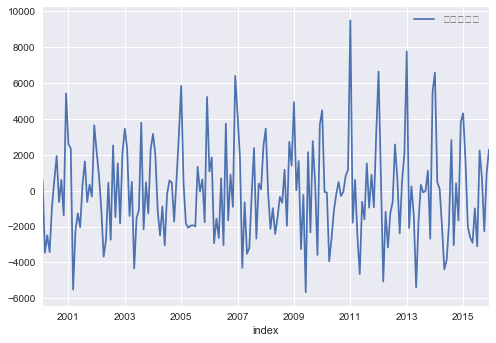

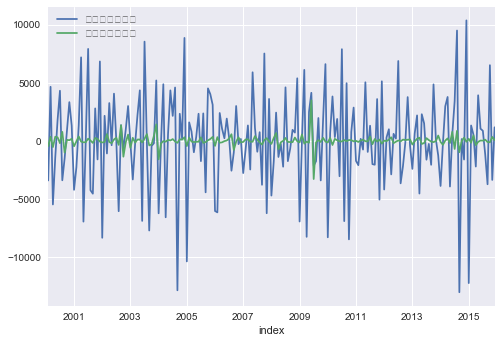

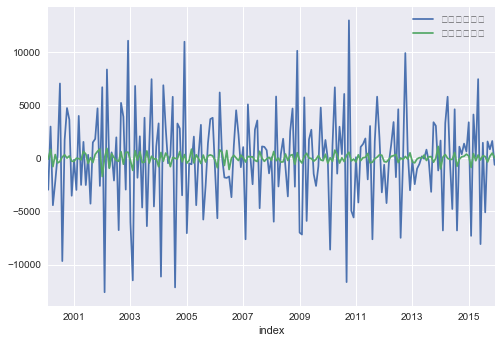

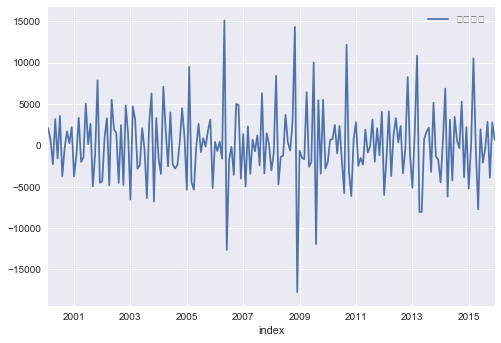

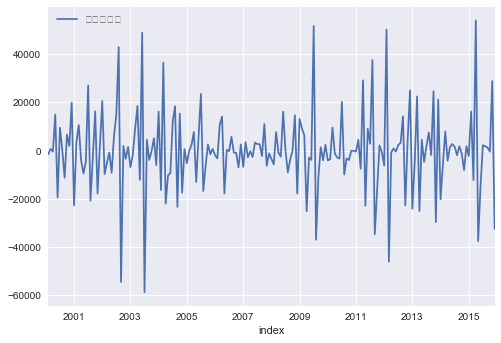

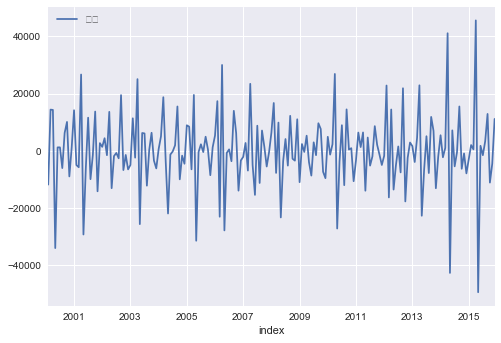

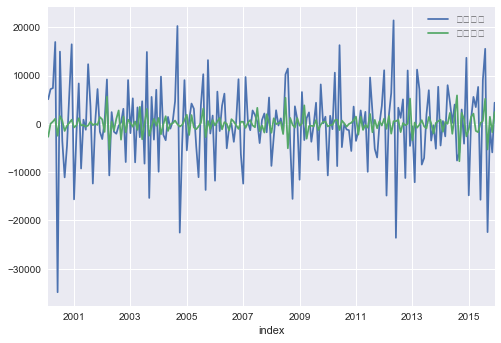

In [157]:
#差分
consumption_diff.plot()
food_diff.plot()
estate_diff.plot()
utility_diff.plot()
furniture_diff.plot()
cloth_diff.plot()
medical_diff.plot()
com_diff.plot()
edu_diff.plot()
edu_fun_diff.plot()

In [158]:
diff_data_2 = pd.concat([consumption_diff,food_diff,estate_diff,utility_diff,furniture_diff,cloth_diff,medical_diff,com_diff,edu_diff,edu_fun_diff],axis=1)

In [161]:
diff_data_2.columns = [
    'total_consumption'
    ,'food'
    ,'estate'
    ,'utility'
    ,'furniture'
    ,'furniture_2'
    ,'cloth'
    ,'cloth_2'
    ,'medical'
    ,'telecom'
    ,'education'
    ,'edu_fun'
    ,'edu_fun_2'
]

In [162]:
x_train = diff_data
y_train = diff_data_2

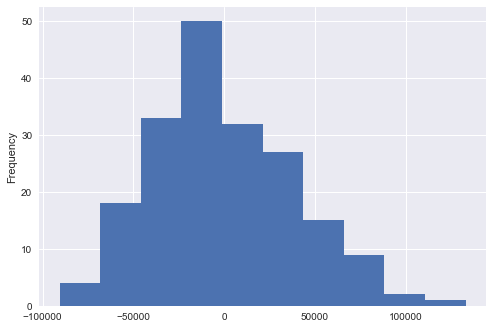

In [163]:
y_train['total_consumption'].plot(kind='hist')

In [164]:
x_train = x_train.reset_index().loc[:,['avg_temp','sun','avg_wind','rain_sum']]
con_train = y_train.loc[:,['total_consumption']].reset_index().drop(['index'],axis=1)

In [165]:
x_train

avg_temp    sun  avg_wind  rain_sum
0        -1.7   54.9       0.2     -73.5
1         3.4    3.8       0.5     111.0
2         5.0  -29.0      -0.3       3.5
3         5.1   23.4      -0.4     -43.0
4         2.3  -64.5       0.0     192.5
5         5.0   95.6       0.3     -43.5
6         0.8    0.1      -0.7    -128.0
7        -2.8  -96.9       0.1     214.0
8        -6.3  -38.8      -0.2    -168.5
9        -5.3   17.4       0.5     -14.0
10       -4.3   74.8       0.0    -118.5
11       -3.9  -10.9       0.6     138.0
12        1.6  -27.0      -0.5    -108.0
13        3.2   34.4       0.5      95.0
14        5.6   45.3      -0.2     -69.5
15        3.7  -56.6      -0.4     130.5
16        3.5  -55.5      -0.5     -53.5
17        5.2  161.0       0.9     -94.5
18       -1.6 -142.7      -1.1     116.0
19       -3.2  -13.8       0.4      53.0
20       -4.5   30.4       0.1      91.0
21       -5.7   22.6      -0.3    -167.0
22       -4.4   29.7       0.4     -97.5
23       -0.8   -2.2       0.5      62.5
24        0.2  -28.7      -0.5     -71.0
25        4.4   33.2       0.7      67.5
26        3.8  -38.7       0.1     -34.5
27        2.1  -11.3      -0.8      74.5
28        3.0  -24.9      -0.2     101.0
29        6.2   68.8       1.0     -57.0
..        ...    ...       ...       ...
161       4.3   35.0      -0.1    -103.0
162       2.1   65.7       0.1      -0.5
163      -3.9  -63.5       0.3     112.5
164      -5.1  -55.1       0.4     202.0
165      -6.2   61.1      -0.5    -373.0
166      -5.0    8.2      -0.1      33.0
167      -1.8   13.4       0.3     -15.5
168      -0.6  -80.6       0.5      89.0
169       4.3   71.5       0.1       0.5
170       4.2   24.5      -0.9      26.5
171       5.2   31.0       0.4     -27.0
172       3.1  -80.9      -0.9     221.0
173       3.3   25.4       0.1    -280.0
174       0.9   -0.2       1.1      57.0
175      -4.0  -30.7      -1.0     -37.0
176      -4.2  -24.0       0.2     387.5
177      -4.6   -0.4       0.2    -386.0
178      -6.5   55.1      -0.1      -3.0
179      -1.3   -8.4       0.3      19.5
180       0.2  -21.6      -0.2     -53.5
181       4.1   17.6       0.4      60.0
182       4.1  -32.4      -0.2       8.0
183       6.2   97.4      -0.1     -51.5
184       1.1 -106.8      -0.8      76.0
185       4.1   61.7       0.8     180.0
186       0.8  -28.0      -0.3    -207.5
187      -3.9  -51.4      -0.1     365.0
188      -4.0   66.6       0.1    -429.0
189      -4.2  -69.1      -0.1      83.0
190      -4.6   44.7       0.3     -27.0

[191 rows x 4 columns]

In [166]:
con_train

total_consumption
0             -30346.0
1              44758.0
2              -7959.0
3              -7416.0
4             -61825.0
5              63727.0
6             -48657.0
7             -28560.0
8              53243.0
9              -5762.0
10             96337.0
11            -83227.0
12            -32210.0
13             70667.0
14            -23618.0
15            -42954.0
16            -22457.0
17             83423.0
18            -39341.0
19            -32203.0
20             30532.0
21            -15391.0
22             80149.0
23            -41969.0
24            -36759.0
25             45760.0
26            -18714.0
27              4032.0
28            -14493.0
29             40448.0
..                 ...
161             5990.0
162            14056.0
163           -13318.0
164            51897.0
165           -55283.0
166            77244.0
167           -33254.0
168           -16874.0
169              322.0
170            64962.0
171           -57369.0
172            -8975.0
173            12469.0
174            20781.0
175           -21390.0
176            -4574.0
177            -5264.0
178            39529.0
179           -43484.0
180           -20245.0
181            31139.0
182           132974.0
183           -90625.0
184           -38800.0
185            -5489.0
186            55752.0
187           -55671.0
188            -2174.0
189            23259.0
190            14710.0

[191 rows x 1 columns]

In [167]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(x_train, con_train)
print('Training done using Random Forest')

Training done using Random Forest


/Users/Taishi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


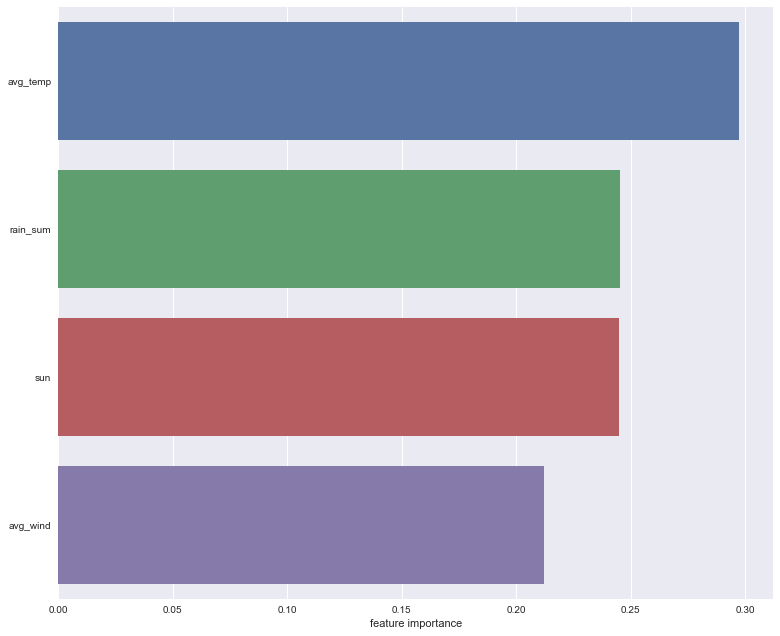

In [168]:
#plot
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=x_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

# 気温がもっとも効果ありそう
# ARIMAモデルで推定じゃ！

In [ ]:
x_train.head()

In [ ]:
#自己相関
ts_acf = st.acf(diff_data.values.ravel(),nlags=40)
ts_acf_2 = st.acf(diff_data_2.values.ravel(),nlags=40)
print (ts_acf)
print (ts_acf_2)

In [ ]:
#偏自己相関
par_ts_acf = st.pacf(diff_data.values.ravel(),nlags=40)
par_ts_acf_2 = st.pacf(diff_data.values.ravel(),nlags=40)
print (par_ts_acf)
print (par_ts_acf_2)

In [ ]:
# 自己相関のグラフ
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_data.values.ravel(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_data.values.ravel(), lags=40, ax=ax2)

In [ ]:
# 自己相関のグラフ
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_data_2.values.ravel(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_data_2.values.ravel(), lags=40, ax=ax2)

In [ ]:
resDiff = sm.tsa.arma_order_select_ic(diff_data.values.ravel(), ic='aic', trend='nc')
resDiff

In [ ]:
# 差分系列への自動ARMA推定関数の実行
#aic_min_order = (4,2)なので
resDiff_2 = sm.tsa.arma_order_select_ic(diff_data_2.values.ravel(), ic='aic', trend='nc')
resDiff_2

In [ ]:
#aic_min_order = (4,2)なので
results = ARIMA(diff_data.values.ravel(),order = [4,1,2]).fit()

In [ ]:
#aic_min_order = (4,2)なので
results2 = ARIMA(diff_data.values.ravel(),order = [3,1,2]).fit()

In [ ]:
results.params

In [ ]:
results2.params

In [ ]:
resid = results.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [ ]:
resid = results2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [35]:
SARIMA_3_1_2_111 = sm.tsa.statespace.sarimax.SARIMAX(diff_data.values.ravel(), order=(3,1,2), seasonal_order=(1,1,1,12)).fit()
print(SARIMA_3_1_2_111.summary())

AttributeError: module 'statsmodels.tsa.api' has no attribute 'statespace'